<a href="https://colab.research.google.com/github/mariron42/FisicaComputacional-1/blob/main/Evaluaci%C3%B3n%203/%20Evaluaci%C3%B3n_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Tercera Evaluación de Física Computacional 1 (2021-1)
Marcel Herrer Rendón
(3 de Mayo de 2021)

La [Ecuación de Reacción-Difusión](https://en.wikipedia.org/wiki/Reaction–diffusion_system) en una dimensión está dada por la ecuación diferencial parcial

\begin{equation*}
\frac{\partial u}{\partial t} = D \frac{\partial^2 u}{\partial x^2} + R(u)
\end{equation*}

donde $D$ es el coeficiente de difusión y $R(u)$ es una función de reacción. La forma de la función $R(u)$, puede describir una colección amplia de fenómenos físicos. 

Comúnmente la ecuación de reacción difusión se utiliza para estudiar la evolución temporal de una mezcla de componentes químicos que reaccionan entre si, por ejemplo

\begin{equation*}
2 H_2 + O_2 \xrightarrow[\leftarrow]{}  2 H_2 O
\end{equation*}

donde se mezclan 2 moleculas de Hidrógeno y una oxígeno, para formar agua, con ayuda de un catalizador que facilite la reacción.

Se pide trabajar el caso donde $R(u) = \alpha u$, 
siendo $\alpha$ el coeficiente de reacción. 

Entonces nos interesa resolver la ecuación

\begin{equation*}
\frac{\partial u}{\partial t} = D \frac{\partial^2 u}{\partial x^2} + \alpha u
\end{equation*}

Aquí $u$ denotaría la concentración del compuesto químico. Si $\alpha=0$, la ecuación anterior se reduce a una simple ecuación de difusión como la que vimos en la ecuación del calor. 

Supondremos que $D=1$ y $\alpha=-1$. 

Resuelve numéricamente la ecuación de reacción-difusión en una dimensión, para estudiar la evolución de un modelo simple de reacción-difusión de mezclar moleculas de $2 H_2$ con $O_2$
en un tubo unidimensional de longitud $L=1$ en la dirección $x$, y que inicialmente se encuentra vacío $u(x,0)=0$ como se muestra en la siguiente figura

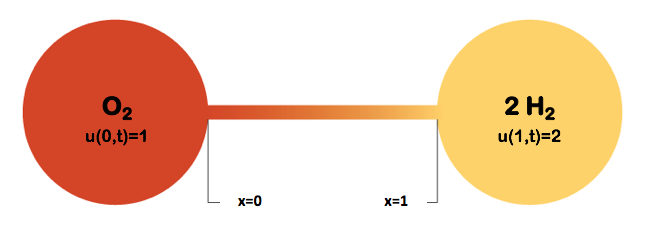


Se pide adaptar el código desarrolado en el sitio del curso de [Numerical Methods using Python](http://people.bu.edu/andasari/courses/numericalpython/python.html) del Dr. Vivi Andasari de la Universidad de Boston.

En la [sesión 15](http://people.bu.edu/andasari/courses/Fall2015/LectureNotes/Lecture15_29Oct2015.pdf), se describen los algoritmos por si desean consultar los detalles. Se resuelve la ecuación de Reacción-Difusión en una dimensión, usando métodos de diferencia finita (Backward Time Centered Space - BTCS).  Se provee el código para problemas de condiciones a la frontera [tipo Dirichlet](http://people.bu.edu/andasari/courses/numericalpython/Week9Lecture15/PythonFiles/BTCS_DirichletBCs.py) y también para el [tipo Neumann](http://people.bu.edu/andasari/courses/numericalpython/Week9Lecture15/PythonFiles/BTCS_NeumannBCs.py).

Por favor descarga ambos códigos para cada caso, dado que se utilizarán en los siguientes 2 problemas.  


In [1]:
# Importar liberías 
import numpy as np
from scipy import sparse
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm


**Problema 1:** 

Resuelve numéricamente la ecuación de reacción-difusión para el caso de condiciones de frontera tipo Dirichlet por el método de BTCS, con condición inicial $u(x,0)=0$, y condiciones a la frontera $u(0,t)=1$ y $u(1,t)=2$, para un tiempo $t=0,..,1$.

Muestra una gráfica de la evolución temporal de la reacción difusión de los compuestos.



True


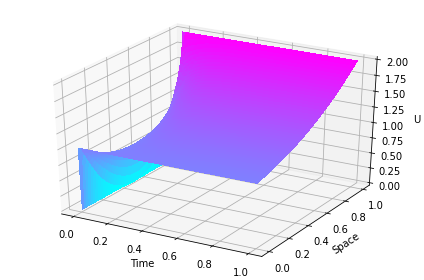

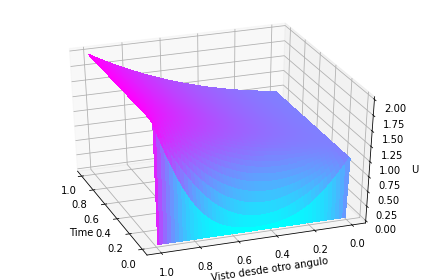

In [15]:
#Método inverso para resolver la ecuación de reacción-difusión 1D:
#    u_t = D * u_xx + alpha * u
    
#con condiciones de contorno de Dirichlet u(x0,t) = 0, u(xL,t) = 0
#y condición inicial u(x,0) = 4*x - 4*x**2


M = 150 # PUNTOS DE LA RED en el intervalo de espacio
N = 400 # PUNTOS DE LA CUADRÍCULA en el intervalo de tiempo

x0 = 0
xL = 1

# ----- Paso de discretización espacial -----
dx = (xL - x0)/(M - 1)

t0 = 0
tF = 1

# ----- Diferencial de tiempo -----
dt = (tF - t0)/(N - 1)

D = 1 # Coeficiente de difucción
alpha = -1 # Tasa de reacción

r = dt*D/dx**2
s = dt*alpha;

xspan = np.linspace(x0, xL, M)
tspan = np.linspace(t0, tF, N)

main_diag = (1 + 2*r - s)*np.ones((1,M-2))
off_diag = -r*np.ones((1, M-3))

a = main_diag.shape[1]

diagonals = [main_diag, off_diag, off_diag]

A = sparse.diags(diagonals, [0,-1,1], shape=(a,a)).toarray()

# ----- Iniciamos la matrix U -----
U = np.zeros((M, N))

#----- Concicción inicial  -----
U[:,0] = 0.0

#----- Condiciones de frontera de Dirichlet -----
U[0,:] = 1.0 #condicion de u(0,t)=1
U[-1,:] = 2.0 #condicion en la frontera L=2

for k in range(1, N):
    c = np.zeros((M-4,1)).ravel()
    b1 = np.asarray([r*U[0,k], r*U[-1,k]])
    b1 = np.insert(b1, 1, c)
    b2 = np.array(U[1:M-1, k-1])
    b = b1 + b2  # Lado derecho
    U[1:M-1, k] = np.linalg.solve(A,b)  # Solución x=A\b

# ----- Comprueba si la solución es correcta:
g = np.allclose(np.dot(A,U[1:M-1,N-1]), b)
print(g)

# ----- Graficar la superficice -----
X, T = np.meshgrid(tspan, xspan)

fig = plt.figure()
ax = fig.gca(projection='3d')

surf = ax.plot_surface(X, T, U, linewidth=0,
                       cmap="cool", antialiased=False)
#____________________________
X1=X                       #-
T1=T                       #-
U1=U                       #-
#Graficar 

ax.set_xlabel('Time')
ax.set_ylabel('Space')
ax.set_zlabel('U')
plt.tight_layout()

plt.show()


fig = plt.figure()
ax = fig.gca(projection='3d')

surf = ax.plot_surface(X, T, U, linewidth=0,
                       cmap="cool", antialiased=False)
#Graficar desde otro angulo
ax.set_xlabel('Time')
ax.set_ylabel('Visto desde otro angulo')
ax.set_zlabel('U')
plt.tight_layout()
ax.view_init(34, 160)
plt.show()

Al prioncipio la concentración del quimico es 0 pero conforme el espacio crece l concentración crece hasta estavilizarse en 2

**Problema 2:**

Ahora supondremos que se colocan reguladores de presión, que permiten flujo de los gases desde los reservorios hacia el tubo inicialmente vacío $u(x,0) = 0$. En $x=0$, el flujo de gas es $\partial u/\partial x (0,t) = 0.1$  y en $x=1$ el flujo $\partial u/\partial x (1,t) = 0.2$.

Se pide realizar una simulación numérica de este escenario para $=0,..,10$.


True


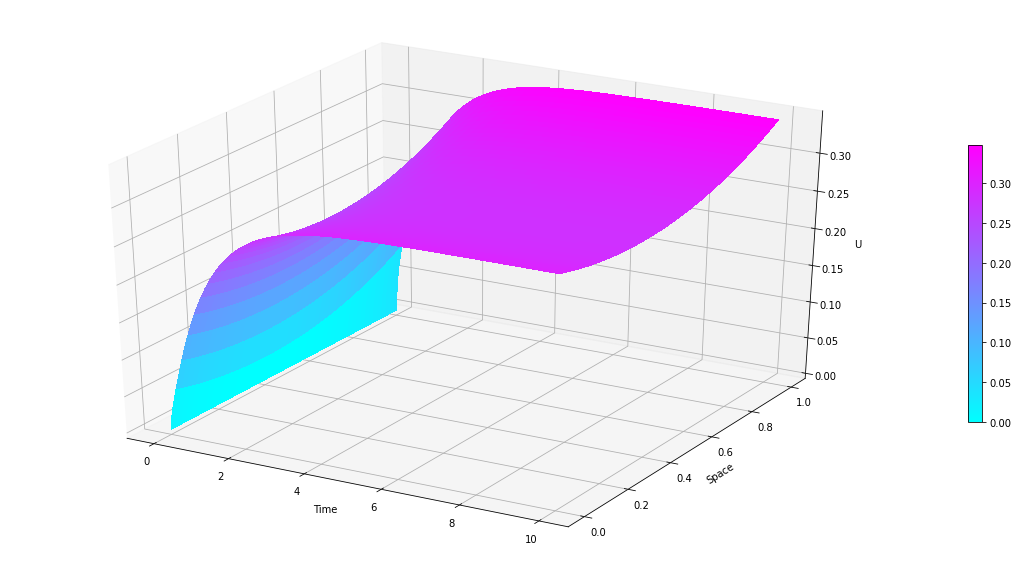

In [18]:

#Método inverso para resolver la ecuación de reacción-difusión 1D:
# u_t = D * u_xx + alpha * u
    
#con condiciones de contorno de Neumann
#en x = 0: u_x = sin (pi / 2)
#en x = L: u_x = sin (3 * pi / 4) con L = 1
#y condición inicial u (x, 0) = 4 * x - 4 * x ** 2

M = 200 #  PUNTOS DE LA RED en el intervalo de espacio
N = 200 # PUNTOS DE LA RED en el intervalo de tiempo

x0 = 0
xL = 1

# ----- Paso de discretización espacial -----
dx = (xL - x0)/(M - 1)

t0 = 0
tF = 10

# ----- Diferencial de tiempo -----
dt = (tF - t0)/(N - 1)

D = 1  # Coeficiente de difusión
alpha = -1 # Tasa de reacción

r = dt*D/dx**2
s = dt*alpha
a = 1 + 2*r - s


xspan = np.linspace(x0, xL, M)
tspan = np.linspace(t0, tF, N)

main_diag = (1 + 2*r - s)*np.ones((1,M))
off_diag = -r*np.ones((1, M-1))

a = main_diag.shape[1]

diagonals = [main_diag, off_diag, off_diag]

A = sparse.diags(diagonals, [0,-1,1], shape=(a,a)).toarray()
A[0,1] = -2*r
A[M-1,M-2] = -2*r

# ----- Initializes matrix U -----
U = np.zeros((M, N))

#----- Condición inicial -----
U[:,0] = 0

#----- Condiciones de frontera de Neumann -----
tiempo = np.ones([N+1, 1])
f = 0.1*tiempo # Para (0,t)=0.1

g = 0.2*tiempo # Para (1,t)=0.2


for k in range(1, N):
    c = np.zeros((M-2,1)).ravel()
    b1 = np.asarray([2*r*dx*f[k], 2*r*dx*g[k]])
    b1 = np.insert(b1, 1, c)
    b2 = np.array(U[0:M, k-1])
    b = b1 + b2  # Lado derecho
    U[0:M, k] = np.linalg.solve(A,b)  # Resolver x=A\b

# ----- Comprueba si la solución es correcta:
gc = np.allclose(np.dot(A,U[0:M,N-1]), b)
print(gc)

# ----- Imprimir la superficie  -----
X, T = np.meshgrid(tspan, xspan)

fig = plt.figure(figsize=(16,8))
ax = fig.gca(projection='3d')

surf = ax.plot_surface(X, T, U, linewidth=0,
                       cmap=cm.cool, antialiased=False)

#ax.set_yticks([0, 0.25, 0.5, 0.75, 1.0])
#ax.set_xticks([0, 0.05, 0.1, 0.15, 0.2])

# Grafica una tabla de valores 
m = cm.ScalarMappable(cmap=cm.cool)
m.set_array(U)
plt.colorbar(m,shrink=0.5)

ax.set_xlabel('Time')
ax.set_ylabel('Space')
ax.set_zlabel('U')
plt.tight_layout()
plt.show()

Se nota como va llenandose más rapido de un lado que del otro pero se estaviliza como entre los 6 a 10 segundos en 0.30

**Problema 3:**

¿Que pasaría en el caso de que se mezclaran dos gases que no reaccionan entre si, como sería mezclar dos recipientes con el  mismo tipo de gas (el coeficiente de reacción $\alpha=0$)?.

Suponga que inicialmente el tubo está vacío $u(x,0)=0$ y la concentración en $u(0,t)=1$ y $u(1,t)=2$.

Resuelva numéricamente este caso. 

True


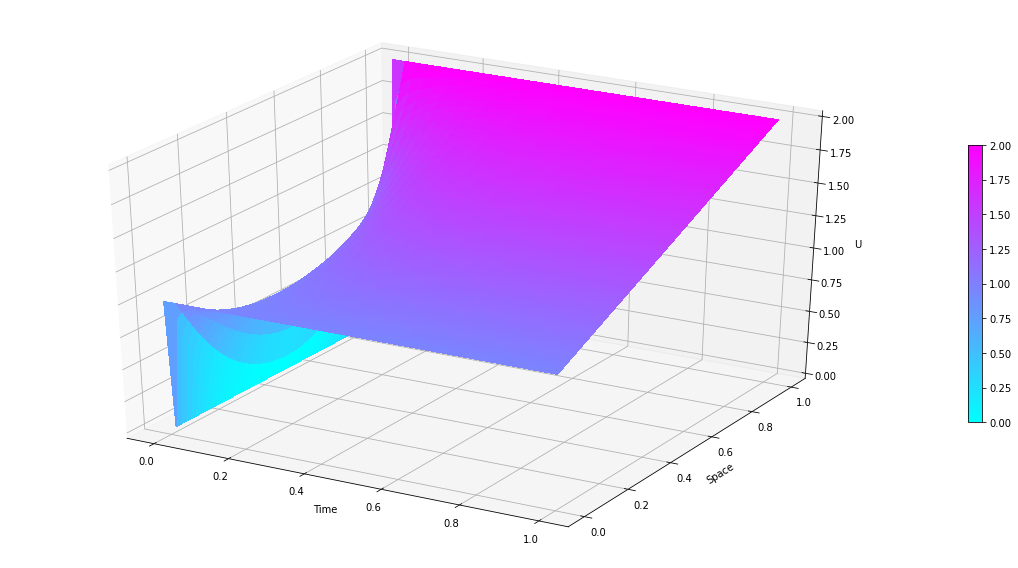

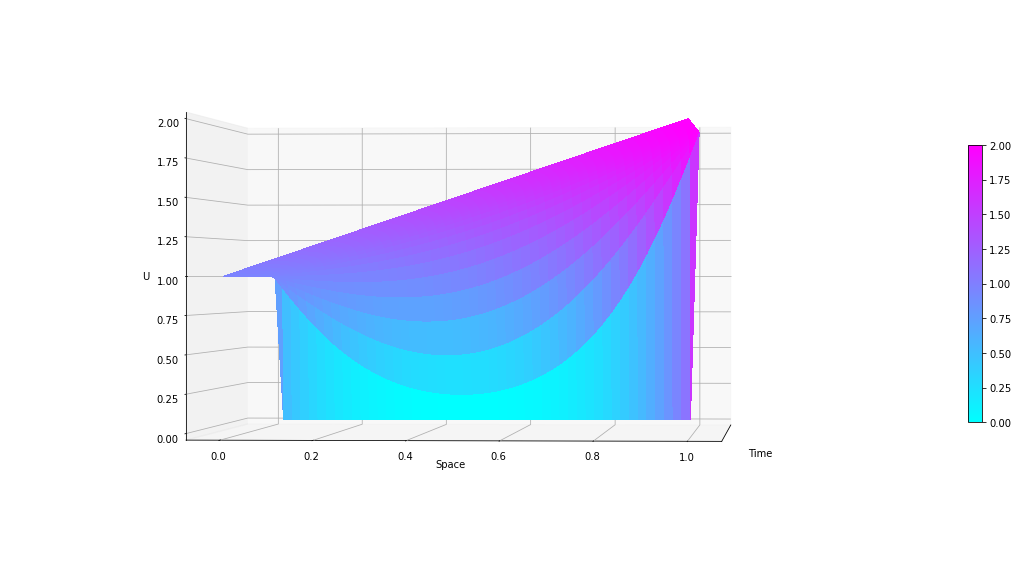

In [24]:
'''
Método inverso para resolver la ecuación de reacción-difusión 1D:
     u_t = D * u_xx + alpha * u
    
con condiciones de frontera de Dirichlet u (x0, t) = 0, u (xL, t) = 0
y condición inicial u (x, 0) = 4 * x - 4 * x ** 2
'''


M = 50 # PUNTOS DE LA RED en el intervalo de espacio
N = 60 # PUNTOS DE LA RED en el intervalo de tiempo


#Largo de la manguera 
x0 = 0
xL = 1

# ----- Paso de discretización espacial -----
dx = (xL - x0)/(M - 1)
#INTERVALO DE TIEMPO
t0 = 0
tF = 1

# ----- Diferencial de tiempo -----
dt = (tF - t0)/(N - 1)

D = 1 # Coeficiente de difusión
alpha = 0 # Tasa de reacción

r = dt*D/dx**2
s = dt*alpha;

xspan = np.linspace(x0, xL, M)
tspan = np.linspace(t0, tF, N)

main_diag = (1 + 2*r - s)*np.ones((1,M-2))
off_diag = -r*np.ones((1, M-3))

a = main_diag.shape[1]

diagonals = [main_diag, off_diag, off_diag]

A = sparse.diags(diagonals, [0,-1,1], shape=(a,a)).toarray()

# ----- Inicializa la matriz U -----
U = np.zeros((M, N))

#----- Condición inicial -----
U[:,0] = 0 # Para u(x,0)=0
# ----- Condiciones de contorno de Dirichlet -----
U[0,:] = 1.0 # Condiciones en la frontera u(0,t)=1
U[-1,:] = 2.0 # u(1,t)=2

for k in range(1, N):
    c = np.zeros((M-4,1)).ravel()
    b1 = np.asarray([r*U[0,k], r*U[-1,k]])
    b1 = np.insert(b1, 1, c)
    b2 = np.array(U[1:M-1, k-1])
    b = b1 + b2  # Lado derecho
    U[1:M-1, k] = np.linalg.solve(A,b)  # Resolver x=A\b

# -----Ver si la solucción es correcta:
g = np.allclose(np.dot(A,U[1:M-1,N-1]), b)
print(g)

# ----- Imprimir la superficie  -----
X, T = np.meshgrid(tspan, xspan)

fig = plt.figure(figsize=(16,8))
ax = fig.gca(projection='3d')

surf = ax.plot_surface(X, T, U, linewidth=0,
                       cmap=cm.cool, antialiased=False)

#ax.set_xticks([0, 0.05, 0.1, 0.15, 0.2])

# Grafica 
m = cm.ScalarMappable(cmap=cm.cool)
m.set_array(U)
plt.colorbar(m,shrink=0.5)

ax.set_xlabel('Time')
ax.set_ylabel('Space')
ax.set_zlabel('U')
plt.tight_layout()
plt.show()

#Graficar desde otro punto de vista 
fig = plt.figure(figsize=(16,8))
ax = fig.gca(projection='3d')

surf = ax.plot_surface(X, T, U, linewidth=0,
                       cmap=cm.cool, antialiased=False)

ax.set_xticks([])

# Grafica una tabla de valores 
m = cm.ScalarMappable(cmap=cm.cool)
m.set_array(U)
plt.colorbar(m,shrink=0.5)

ax.set_xlabel('Time')
ax.set_ylabel('Space')
ax.set_zlabel('U')
ax.view_init(elev=0, azim=4)
plt.tight_layout()
plt.show()

Aunque se parecen esta y la uno se logra el equilibrio mucho antes pues tiene mayo pendiente 

**NOTA:** 
Describa en cada problema, lo que se realiza y comente los resultados de su simulación. Si hay alguna observación o comentario adicional que desee hacer, hágalo por favor.  

Al finalizar la evaluación, por favor guarde su cuaderno de Jupyter llamado *Evaluación3* en su repositorio Github del curso y anote su avance. 

Gracias por participar. 
¡Suerte!